# Example Script of the General Teacher

This is an example script of the General Teacher. For the action search, one only has to execute the `general_teacher
 ()` method.  Note that this might take some time, depending on your resources

In [2]:
#comment

In [3]:
import os
import grid2op
from pathlib import Path
import logging
from lightsim2grid import LightSimBackend

example_path = os.getcwd()

First, check whether the Grid2Op Environment can be loaded and executed

In [4]:
backend = LightSimBackend()
env = grid2op.make("l2rpn_case14_sandbox", backend=backend)
obs = env.get_obs()

In [5]:
from curriculumagent.teacher.teacher import general_teacher


After importing the module, we run the General Teacher Search. Again note, that this might take a while. If you have a
limited amount of CPU power, you can reduce the number of jobs accordingly

In [6]:
# Initialize values:
logging.basicConfig(level=logging.INFO)



In [7]:

path_of_file = Path(example_path) / "data"
path_of_env = "l2rpn_case14_sandbox"
general_teacher(n_episodes= 0, save_path=path_of_file,
                  env_name_path=path_of_env)


INFO:pandapower.convert_format:These dtypes could not be corrected: {'trafo': ['tap_min', 'tap_max']}
INFO:root:The following 0 tasks will be distributed to a pool of 16 workers: []
INFO:root:Parallel time: 0.12115597724914551s


After Running the Action Search, it is necessary to collect the experience for the tutor.


In [10]:
from curriculumagent.teacher.collect_teacher_experience import make_unitary_actionspace

INFO:root:Read 4218 teacher_experience samples from [WindowsPath('c:/Users/thoma/MA/curriculumagent/jupyter_notebooks/data/teacher_experience.csv')]
INFO:root:Kept 3269 after filtering
INFO:pandapower.convert_format:These dtypes could not be corrected: {'trafo': ['tap_min', 'tap_max']}
INFO:root:There are 176 unique actions
INFO:root:Save an action space with the size of 176
INFO:root:Saved 176 actions after ranking with best_n=250 to c:\Users\thoma\MA\curriculumagent\jupyter_notebooks\data\example_teacher_actionspace.npy


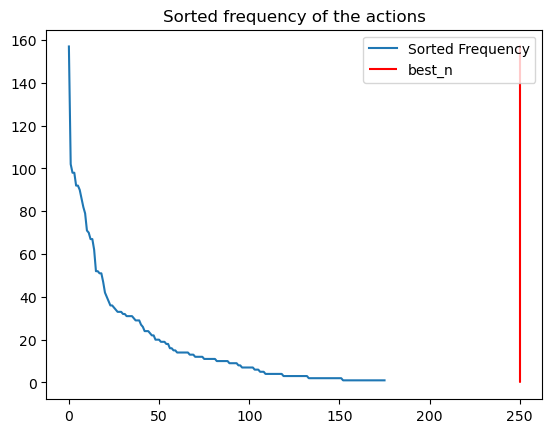

In [11]:
path_of_experience = Path(example_path) / "data"
path_of_env = "l2rpn_case14_sandbox"
#list_of_experience = [name for name in os.listdir(path_of_experience) if ".csv" in name]
experience_file = Path(path_of_experience)/ "teacher_experience.csv"

make_unitary_actionspace(action_space_file_path=Path(example_path) / "data" / "example_teacher_actionspace.npy",
                         experience_csv_files=[experience_file],
                         env_name_path=path_of_env,
                         best_n=250)